<a href="https://colab.research.google.com/github/JeanJulesBigeard/Getting-started-with-OpenCV/blob/master/Text_Detection/5_Text_Detection_CRAFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="blue">Text Detection using CRAFT </font>
In this notebook, we will discuss how to use the CRAFT text detection model. We will use a library called [Keras-ocr](https://github.com/faustomorales/keras-ocr) developed Fausto Morales and other contributors.

## <font color="blue">What is Keras-ocr?</font>
Keras-ocr is a python package for performing OCR. It implements a Text Detection -> Text Recognition pipeline where Text Detection is done using the CRAFT algorithm published in CVPR-2019 and Text Recognition is done using the [CRNN algorithm](https://arxiv.org/abs/1507.05717) which was published in TPAMI-2017.

It is released under the MIT license making it a free software. While there are many text detection papers which provide code and models, it is sometimes difficult to make them work. The good thing about Keras-ocr is that it is also available as a [pypi package](https://pypi.org/project/keras-ocr/) making it easy to install and use.

Moreover, the library has quite a few utility functions which help in OCR related tasks. For example, it has functionality for generating bounding boxes, aligning them, annotating images with bounding boxes and text etc.

We will discuss the Text Detection process in this notebook and Text Recognition in the next notebook.

# <font color="blue">1. Install Keras-OCR package</font>

In [0]:
!pip install keras-ocr > /dev/null

# <font color="blue">2. Import Libraries</font>

In [0]:
import keras_ocr
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

# <font color="blue">3. Create a Detector Object</font>
You can create a detector object using the following function. Check out the [documentation](https://keras-ocr.readthedocs.io/en/latest/api.html#keras_ocr.detection.Detector) if you need more details.

In [3]:
detector = keras_ocr.detection.Detector()

Looking for /root/.keras-ocr/craft_mlt_25k.h5


# <font color="blue">4. Download Images</font>

In [0]:
!wget https://www.dropbox.com/s/xz24vxrp4uvvnri/license_plate.jpg?dl=0 -O demo1.jpg --quiet
!wget https://www.dropbox.com/s/uwlnxiihqgni57o/streetsign1.jpg?dl=0 -O demo2.jpg --quiet
!wget https://www.dropbox.com/s/dbkag5gsicxqoqg/streetsign2.jpg?dl=0 -O demo3.jpg --quiet

# <font color="blue">5. Load Images</font>

Get all images starting with demo and create a list. We will perform detection on this list of images.

In [0]:
imageNames = glob.glob("demo*.jpg")

In [0]:
images = [keras_ocr.tools.read(imageName) for imageName in imageNames]

# <font color="blue">6. Detect Text</font>
For detection, we need to **`call the detector with a list of images.`**

It returns a list containing the bounding boxes for each image.

Caution: If you want to run on only a single image, you need to put that in a list, otherwise it will throw an error.

In [0]:
detections = detector.detect(images)

# <font color="blue">7. Display Annotated Output</font>
For displaying the annotated bounding boxes, we can use the function **`drawBoxes`**. It takes in the image and detections from the detector and returns an image with the boxes annotated on it.

It uses opencv to draw the boxes under the hood.

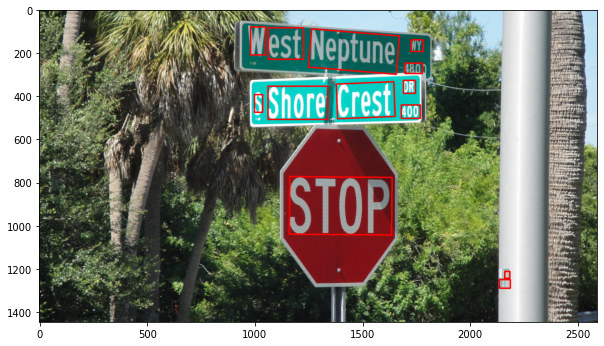

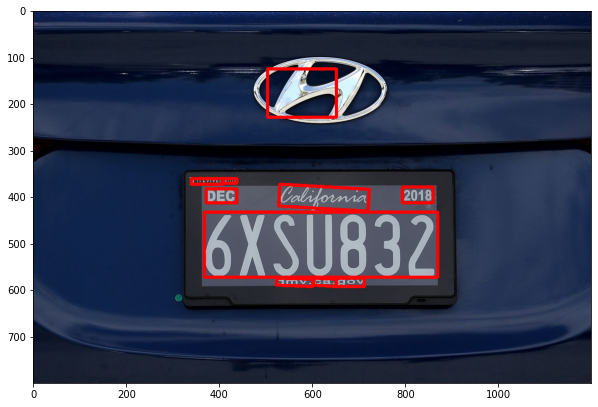

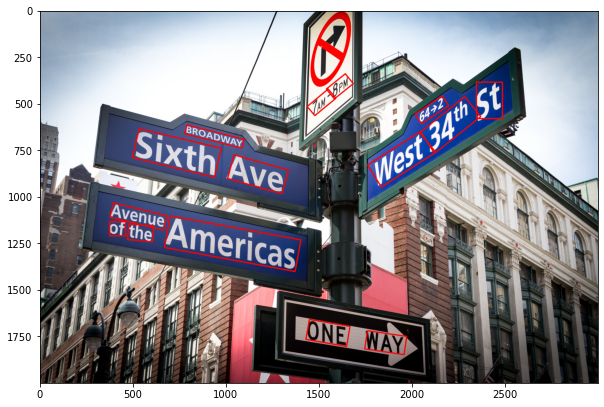

In [8]:
# Plot the predictions
for image, detection in zip(images, detections):
    img = keras_ocr.tools.drawBoxes(image=image, boxes=detection)
    plt.figure(figsize=[10,10])
    plt.imshow(img)
    plt.show()

# <font color="blue">8. Save cropped and aligned text boxes</font>
We need to get all cropped text boxes. Then either save it for future use or store it in a variable.

We use the function **`warpBox`** which aligns the bounding box using a perspective transform. You need to pass a single bounding box along with the image and it will return the cropped and aligned text box.

In [0]:
# create a list to store all boxes for all images
image_boxes_all = []
# Go over all images and detections to create cropped and aligned boxes
for imageName, image, detection in zip(imageNames, images, detections):
  # create a list to store all boxes for an image
  image_boxes = []
  for i,det in enumerate(detection):
    # crop and align(warp) the box
    cropped_warped = keras_ocr.tools.warpBox(image, det)
    image_boxes.append(cropped_warped)
    # save the boxes in separate files
    cv2.imwrite("crop{}_{}".format(i,imageName), cv2.cvtColor(cropped_warped,cv2.COLOR_RGB2BGR))
  # Add all boxes for the particular image to the list
  image_boxes_all.append(image_boxes)

We will see how to use these text boxes to improve text recognition accuracy of Tesseract as well as how it is used for Text Recognition in the Keras-ocr library in the next few notebooks.